**TITANIC CLASSIFICATION FOR CALCULATING LIKELIHOOD OF SURVIVAL OF PASSENGERS USING 5 ADVANCED CLASSIFIERS**

In [ ]:
#IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
#LOADING THE DATASET
df = pd.read_csv('/content/tested.csv')

In [ ]:
#PRINTING FIRST 5 ROWS
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#PRINTING THE LAST 5 ROWS
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#DATA PREPROCESSING
#HANDLING MISSING VALUES

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df['Fare'] = imputer.fit_transform(df[['Fare']])
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
#EXPLORATORY DATA ANALYSIS
#GETTING INFORMATION OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#GETTING THE SHAPE OF DATASET
df.shape


(418, 12)

In [ ]:
#GETTING THE TOP 10 VALUES
top_10=df.head(10)
top_10

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
#GETTING THE TYPE OF DATASET
type(df)

pandas.core.frame.DataFrame

In [ ]:
#LISTING THE COLUMNS
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
#LISTING THE VALUE COUNTS OF SURVIVED
df.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [ ]:
#PRINTING PARTICULAR COLUMN VALUES
df['Survived'][0:10]

0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Survived, dtype: int64

In [ ]:
# CREATING A NEW FEATURE CALLED FAMILYSIZE USING FEATURE ENGINEERING
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
#ENCODE CATEGORICAL VALUES
label_encoders = {}
for col in ['Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [ ]:
#SELECTING FEATURES AND LABEL
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = df[features]
y = df['Survived']

In [ ]:
#SPLITTING DATASET INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#STANDARDIZE THE FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



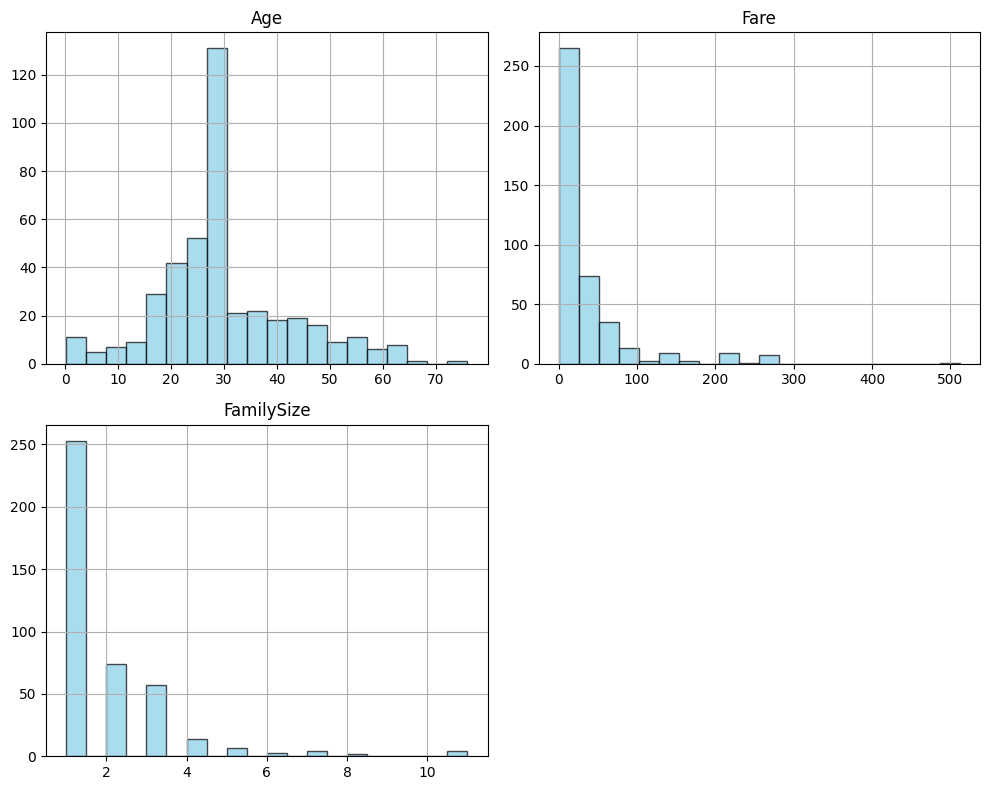

In [ ]:
#DATA VISUALIZATION
#HISTOGRAM FOR NUMERICAL FEATURES
num_features = ['Age', 'Fare', 'FamilySize']
df[num_features].hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-46-2ecf893cf45b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='Set3')
<ipython-input-46-2ecf893cf45b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='Set3')
<ipython-input-46-2ecf893cf45b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[i], palette='Set3')


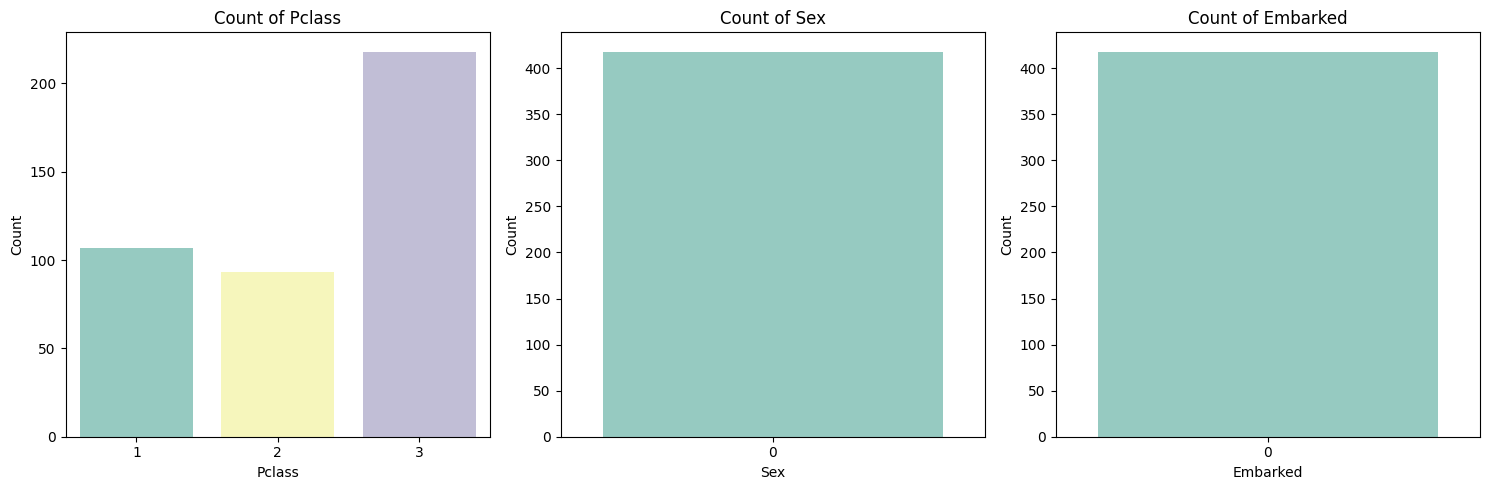

In [ ]:
#BAR PLOTS FOR CATEGORICAL FEATURES
cat_features = ['Pclass', 'Sex', 'Embarked']
fig, axes = plt.subplots(1, len(cat_features), figsize=(15, 5))

for i, feature in enumerate(cat_features):
    sns.countplot(x=feature, data=df, ax=axes[i], palette='Set3')
    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
#BUILDING AND EVALUATING THE 5 MODELS
#1.RANDOM FOREST CLASSIFIER

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.61      0.80      0.69        50
           1       0.44      0.24      0.31        34

    accuracy                           0.57        84
   macro avg       0.53      0.52      0.50        84
weighted avg       0.54      0.57      0.54        84



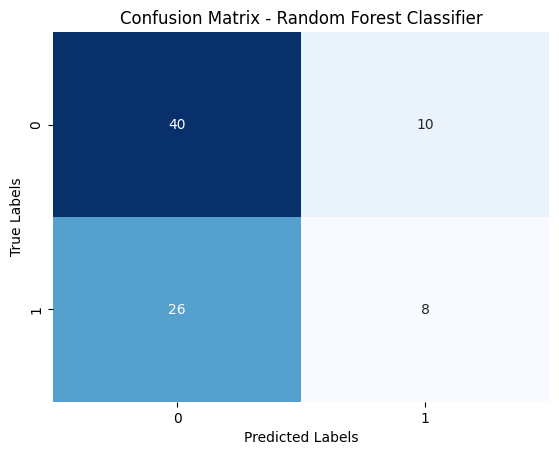

In [ ]:
#CONFUSION MATRIX HEATMAP FOR RANDOM FOREST CLASSIFIER
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


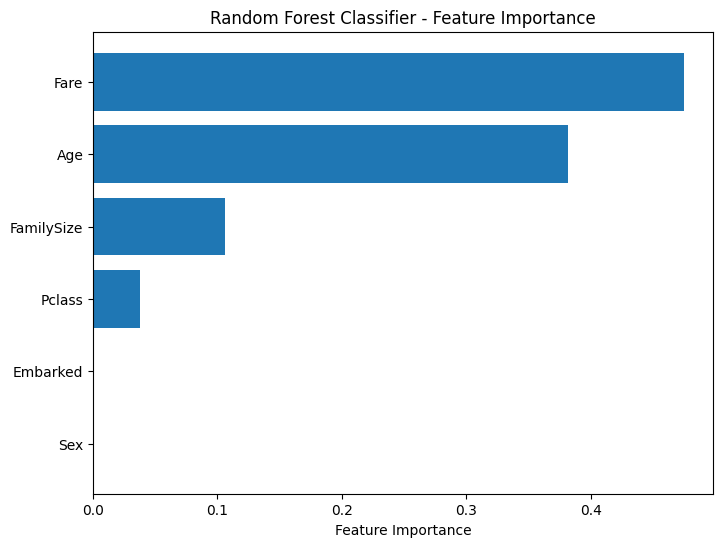

In [ ]:
#FEATURE IMPORTANCE PLOT FOR RANDOM FOREST CLASSIFIER
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()


In [ ]:
#2.GRADIENT BOOSTING CLASSIFIER

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.6190476190476191
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        50
           1       0.56      0.26      0.36        34

    accuracy                           0.62        84
   macro avg       0.60      0.56      0.54        84
weighted avg       0.60      0.62      0.58        84



In [ ]:
#3.SUPPORT VECTOR MACHINE(SVM)


svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.6428571428571429
              precision    recall  f1-score   support

           0       0.63      0.98      0.77        50
           1       0.83      0.15      0.25        34

    accuracy                           0.64        84
   macro avg       0.73      0.56      0.51        84
weighted avg       0.71      0.64      0.56        84



In [ ]:
#4.NEURAL NETWORKS(MULTI LAYER PERCEPTRON)


mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", accuracy_mlp)
print(classification_report(y_test, y_pred_mlp))

MLP Accuracy: 0.6309523809523809
              precision    recall  f1-score   support

           0       0.66      0.78      0.72        50
           1       0.56      0.41      0.47        34

    accuracy                           0.63        84
   macro avg       0.61      0.60      0.60        84
weighted avg       0.62      0.63      0.62        84



In [ ]:
#5.ENSEMBLE LEARNING(VOTING CLASSIFIER)
# Creating a voting classifier with different base models
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svm', svm_model),
    ('mlp', mlp_model)
], voting='hard')

In [ ]:
# TRAINING THE VOTING CLASSIFIER
voting_clf.fit(X_train_scaled, y_train)

#EVALUATING THE VOTING CLASSIFIER
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)
print(classification_report(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.65      0.96      0.77        50
           1       0.80      0.24      0.36        34

    accuracy                           0.67        84
   macro avg       0.72      0.60      0.57        84
weighted avg       0.71      0.67      0.61        84



<ipython-input-54-61d508cb4798>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


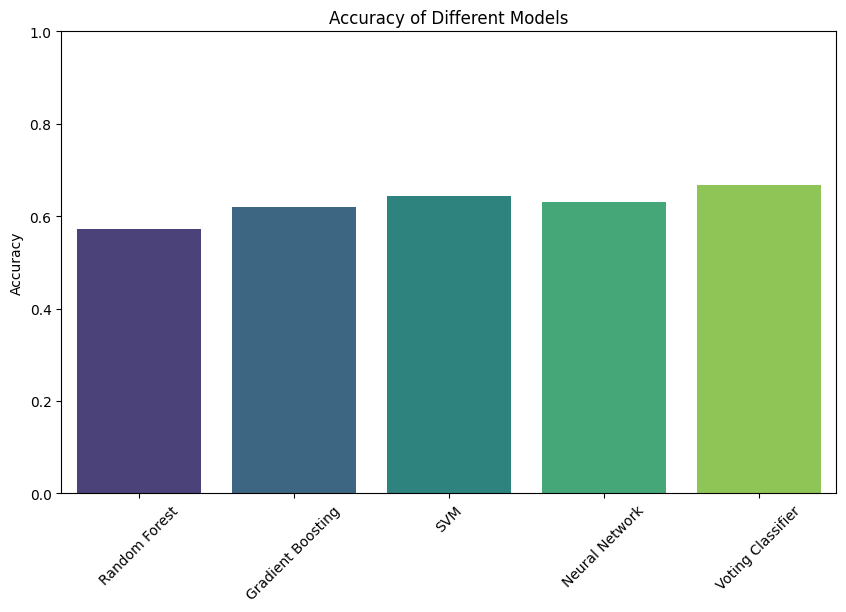

In [ ]:
#BAR PLOT FOR 5 MODEL ACCURACIES
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Voting Classifier']
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm, accuracy_mlp, accuracy_voting]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid
plt.show()


<ipython-input-67-50d78622a057>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=models, y=accuracies, palette='viridis', s=100, color='purple')


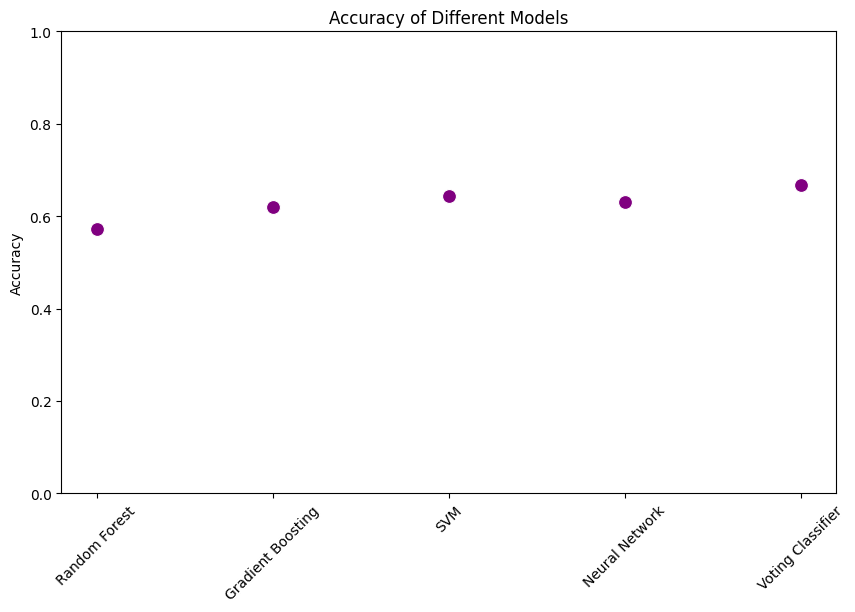

In [ ]:
#SCATTER PLOT FOR 5 MODEL ACCURACIES
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Voting Classifier']
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm, accuracy_mlp, accuracy_voting]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=models, y=accuracies, palette='viridis', s=100, color='purple')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


<ipython-input-68-5fdd8736cf1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=models, y=accuracies, palette='viridis')


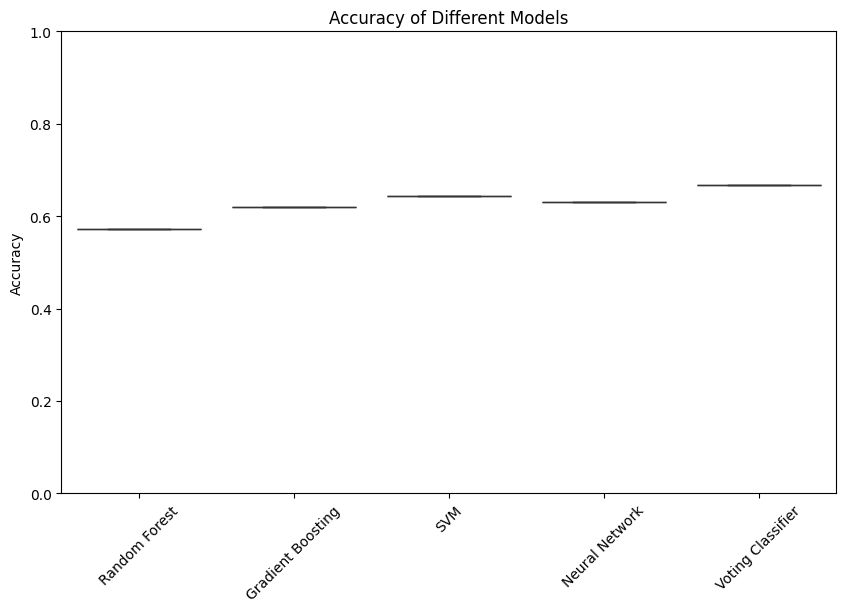

In [ ]:
#BOX PLOT FOR 5 MODEL ACCURACIES
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network', 'Voting Classifier']
accuracies = [accuracy_rf, accuracy_gb, accuracy_svm, accuracy_mlp, accuracy_voting]

plt.figure(figsize=(10, 6))
sns.boxplot(x=models, y=accuracies, palette='viridis')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1.0)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
